# Title : Graduate Admission Prediction
# Author : Mustafa Mert Süerkan
# Date : 07.04.2024
# Caption : This project aims to predict the chance of admission to graduate programs based on various input variables such as test scores, grades, and other application details. The analysis includes data preprocessing, exploratory data analysis, model development, and evaluation using linear regression models.

# 1. Main Objective of the Analysis

#### The primary goal of the analysis is to develop a predictive model for admission status. The emphasis is on building a model that can accurately forecast whether an applicant will be admitted based on relevant input variables such as test scores, grades, and other application details.

# 2. Brief description of the dataset I chose and a summary of its attributes.

### The dataset chosen for this analysis is the "Graduate Admissions" dataset, which contains information about applicants' profiles and their chances of admission to graduate programs. The dataset consists of the following attributes:
    
##### 1. GRE Score: The applicant's GRE test score
##### 2. TOEFL Score: The applicant's TOEFL test score
##### 3. University Rating: The rating of the university that the applicant attended
##### 4. SOP: Statement of Purpose (SOP) score
##### 5. LOR: Letter of Recommendation (LOR) score
##### 6. CGPA: Cumulative Grade Point Average (CGPA)
##### 7. Research: Whether the applicant has research experience (0 = No, 1 = Yes)
##### 8. Chance of Admit: The probability of the applicant being admitted to the graduate program


## Import the required libraries


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the Dataset


In [86]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# 1. About the Data



#### The primary goal of the analysis is to develop a predictive model for admission status. The emphasis is on building a model that can accurately forecast whether an applicant will be admitted based on relevant input variables such as test scores, grades, and other application details.

In [116]:
data.shape

(500, 9)

In [117]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'Total_Score'],
      dtype='object')

In [118]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
Total_Score            int64
dtype: object

In [119]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Total_Score
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,423.664000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,16.679914
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,387.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,412.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,422.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,436.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,460.000000


## We understand that the dataset contains 400 rows and 9 columns.


In [91]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [121]:
# Check distribution of target variable (admission status)
print("\nDistribution of admission status:")
print(data['Chance of Admit '].value_counts())


Distribution of admission status:
Chance of Admit 
0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: count, Length: 61, dtype: int64


In [122]:
# Check for duplicates
print(data.duplicated().sum())

0


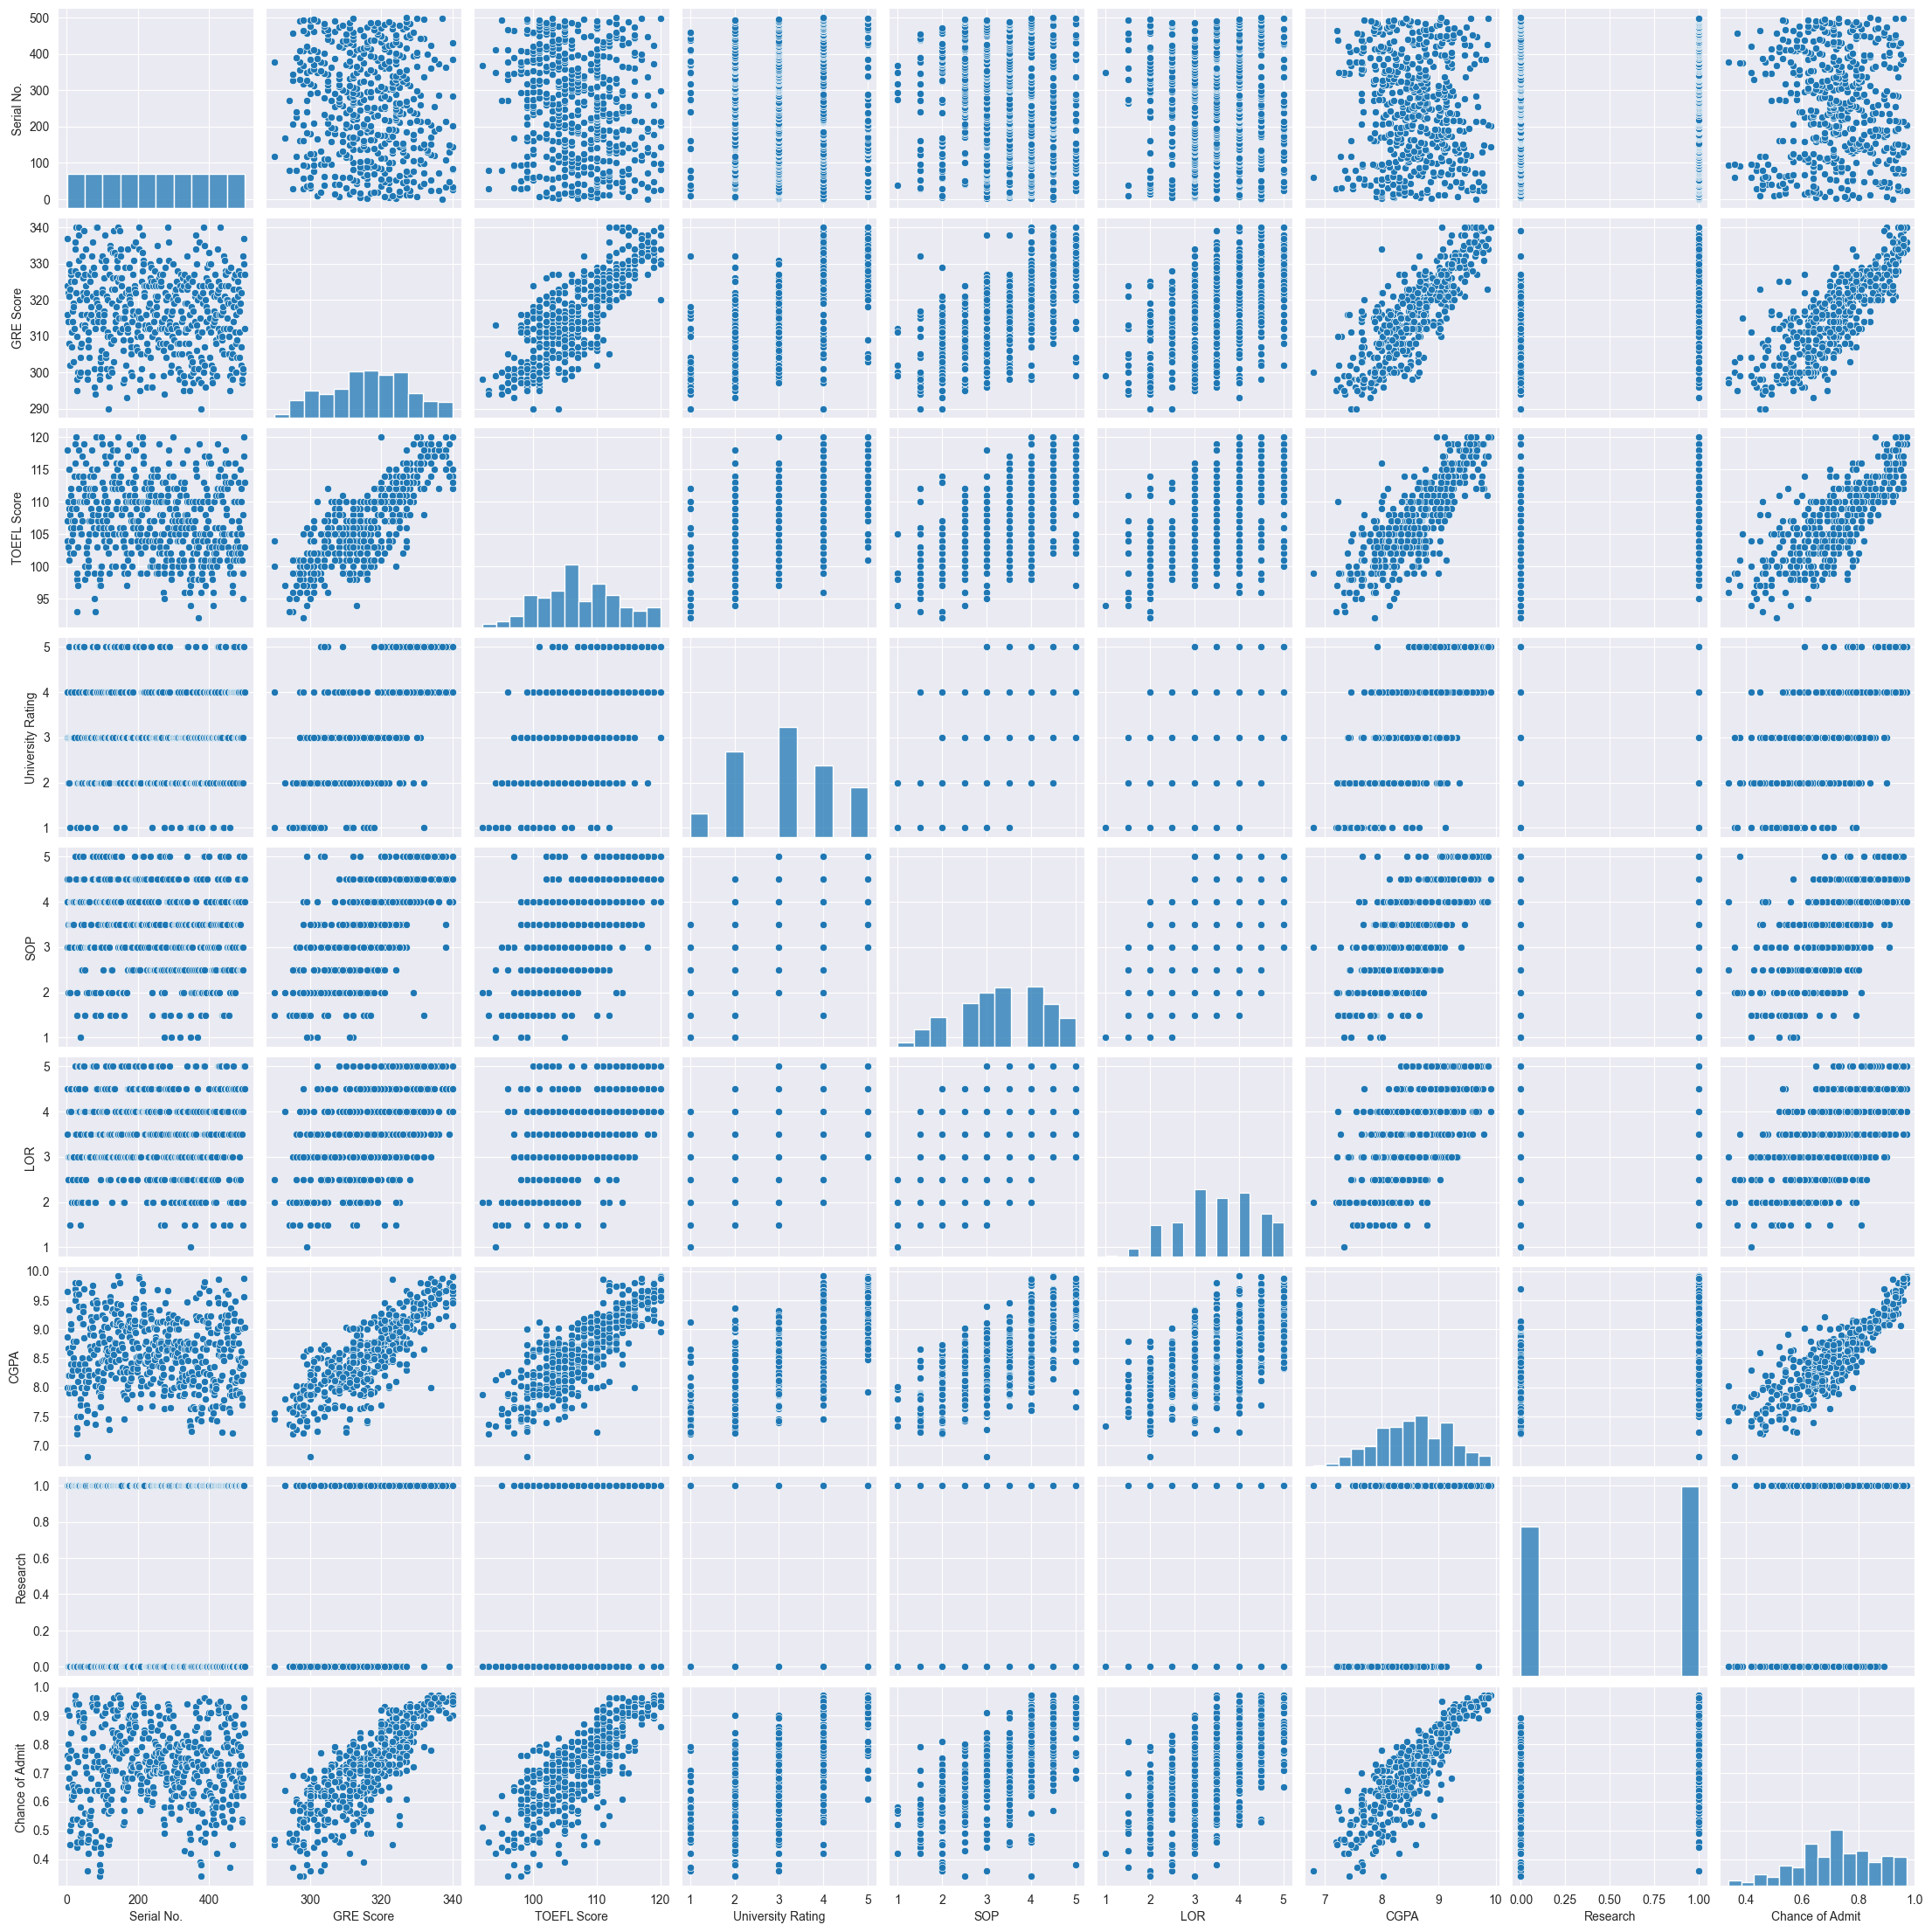

In [94]:
# Visualize distributions and correlations
sns.pairplot(data)
plt.show()

### We can see from above pairplot that the target variable 'Chance of Admit' is positively correlated with GRE Score, TOEFL Score, University Rating, and CGPA.

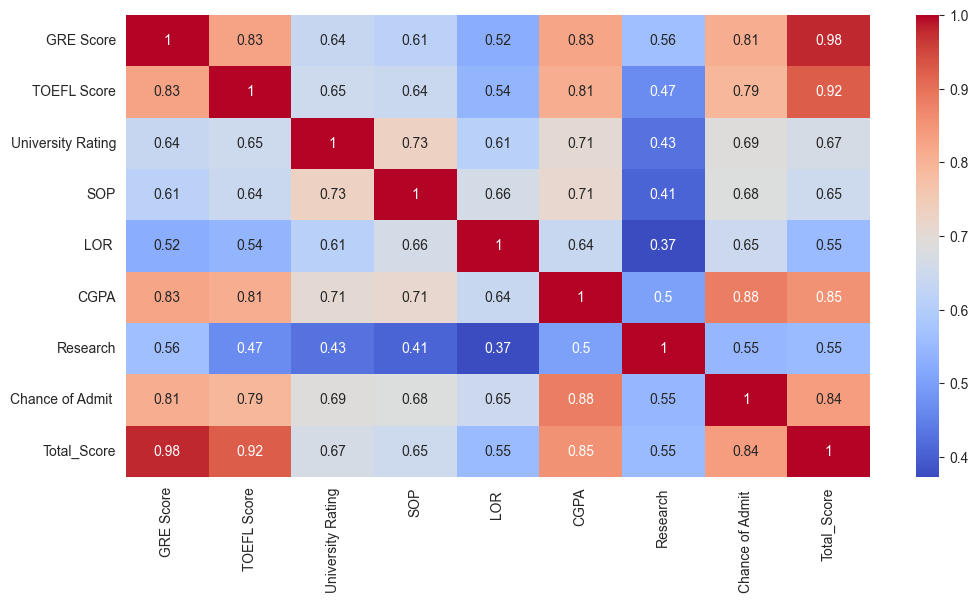

In [124]:
#Visualizing the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

#### We understand that above correlation matrix we can see that GRE Score, TOEFL Score, University Rating, and CGPA are highly correlated with the Chance of Admit.

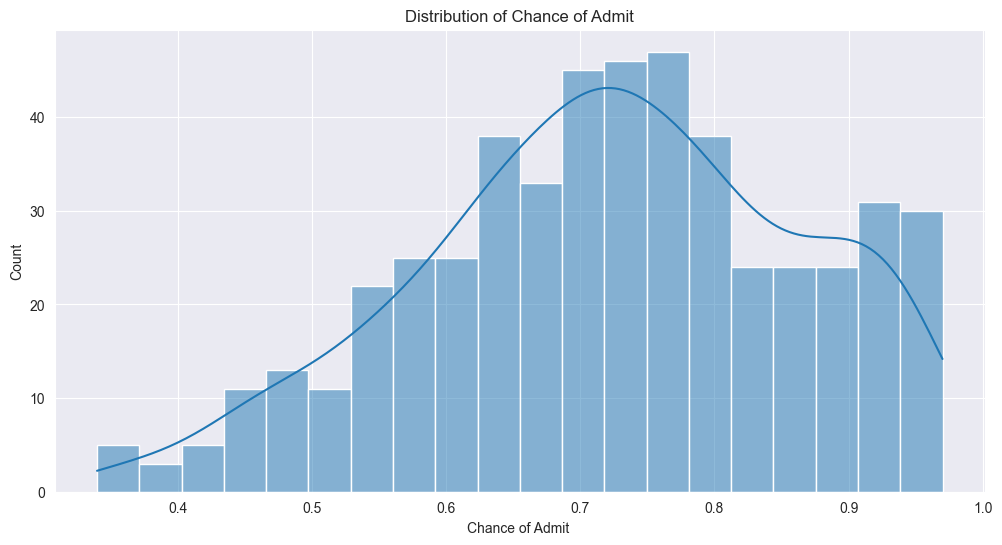

In [96]:
### Visulizing the distribution of the target variable 'Chance of Admit'
plt.figure(figsize=(12, 6))
sns.histplot(data['Chance of Admit '], bins=20, kde=True)
plt.title('Distribution of Chance of Admit')
plt.show()

## We can see that the target variable 'Chance of Admit' is normally distributed with a mean around 0.72.

# Create a new feature 'Total_Score' by adding GRE Score and TOEFL Score

In [98]:
data['Total_Score'] = data['GRE Score'] + data['TOEFL Score']

# 2. Data Preprocessing


#### Drop irrelevant columns because they do not contribute to the prediction

In [99]:
data = data.drop(['Serial No.'], axis=1)

In [100]:
X = data.drop(['Chance of Admit '], axis=1)

In [101]:
y = data['Chance of Admit ']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression Models


## Model 1: Simple Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
lr_predictions = model_lr.predict(X_test)
r2_lr = model_lr.score(X_test, y_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("R2 score for Simple Linear Regression:", r2_lr)

R2 score for Simple Linear Regression: 0.8189326419881622


## Model 2: Linear Regression with Polynomial Features

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2  # Define the degree of polynomial features
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_train, y_train)
poly_predictions = model_poly.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_predictions)
print("Linear Regression with Polynomial Features MSE:", poly_mse)

Linear Regression with Polynomial Features MSE: 0.003547679852248315


## Model 3: Regularized Linear Regression (Ridge Regression)

In [105]:
from sklearn.linear_model import Ridge

alpha = 0.1  # Define the regularization strength
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_train, y_train)
ridge_predictions = model_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Regularized Linear Regression (Ridge) MSE:", ridge_mse)

Regularized Linear Regression (Ridge) MSE: 0.0037063898142656727


## Model 4: Regularized Linear Regression (Lasso Regression)

In [106]:
from sklearn.linear_model import Lasso

# Model 4: Regularized Linear Regression (Lasso Regression)
alpha = 0.1  # Define the regularization strength
model_lasso = Lasso(alpha=alpha)
model_lasso.fit(X_train, y_train)
lasso_predictions = model_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Regularized Linear Regression (Lasso) MSE:", lasso_mse)

Regularized Linear Regression (Lasso) MSE: 0.007083002916535789


## Compare the MSE of all models

In [107]:
# Compare the MSE of all models
def compare_mse(mse_values):
    models = ['Simple Linear Regression', 'Linear Regression with Polynomial Features', 'Ridge Regression', 'Lasso Regression']
    for i in range(len(mse_values)):
        print(models[i], "MSE:", mse_values[i])
compare_mse([lr_mse, poly_mse, ridge_mse, lasso_mse])

Simple Linear Regression MSE: 0.003702827471342084
Linear Regression with Polynomial Features MSE: 0.003547679852248315
Ridge Regression MSE: 0.0037063898142656727
Lasso Regression MSE: 0.007083002916535789


## Finding best polynomial degree using Grid Search

In [108]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'polynomialfeatures__degree': np.arange(1, 10)}
# Perform Grid Search
grid_search = GridSearchCV(estimator=model_poly, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best polynomial degree for Linear Regression with Polynomial Features:", grid_search.best_params_['polynomialfeatures__degree'])


Best polynomial degree for Linear Regression with Polynomial Features: 1


## Finding best alpha for Ridge Regression using Grid Search

In [109]:
## Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Perform Grid Search
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha for Ridge Regression:", grid_search.best_params_['alpha'])

Best alpha for Ridge Regression: 1


## Finding best alpha for Lasso Regression using Grid Search

In [110]:
# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Perform Grid Search
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha for Lasso Regression:", grid_search.best_params_['alpha'])


Best alpha for Lasso Regression: 0.001


C:\Users\mmert\PycharmProjects\CourseraProject\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e-03, tolerance: 6.323e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\mmert\PycharmProjects\CourseraProject\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e-03, tolerance: 6.320e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\mmert\PycharmProjects\CourseraProject\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

## Train Lasso and Ridge again with best alpha

In [111]:
model_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
model_ridge.fit(X_train, y_train)
ridge_predictions = model_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

In [112]:
model_lasso = Lasso(alpha=grid_search.best_params_['alpha'])
model_lasso.fit(X_train, y_train)
lasso_predictions = model_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

C:\Users\mmert\PycharmProjects\CourseraProject\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.302e-03, tolerance: 7.884e-04
  model = cd_fast.enet_coordinate_descent(


In [113]:
compare_mse([lr_mse, poly_mse, ridge_mse, lasso_mse])

Simple Linear Regression MSE: 0.003702827471342084
Linear Regression with Polynomial Features MSE: 0.003547679852248315
Ridge Regression MSE: 0.0037046726988562424
Lasso Regression MSE: 0.00380721541196069


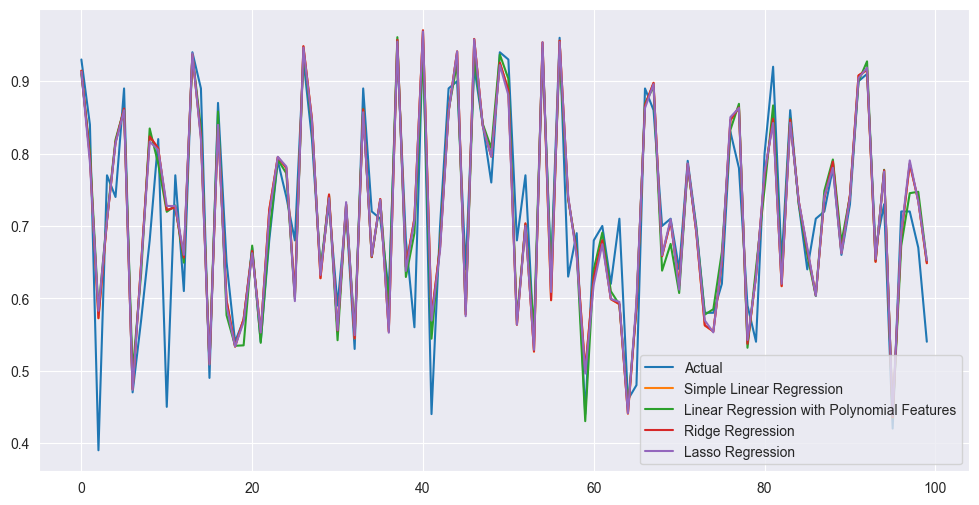

In [114]:
#Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(lr_predictions, label='Simple Linear Regression')
plt.plot(poly_predictions, label='Linear Regression with Polynomial Features')
plt.plot(ridge_predictions, label='Ridge Regression')
plt.plot(lasso_predictions, label='Lasso Regression')
plt.legend()
plt.show()

# 4. Insights and key findings
## Lasso regression also provides us with the feature importance


In [115]:
# Extract feature importance from the Lasso model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model_lasso.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance from Lasso Regression:")
print(feature_importance)

Feature Importance from Lasso Regression:
             Feature  Importance
5               CGPA    0.103371
6           Research    0.018447
4               LOR     0.017224
2  University Rating    0.002735
7        Total_Score    0.002660
3                SOP    0.001811
1        TOEFL Score    0.000626
0          GRE Score    0.000189


# 5. Next Steps


### The best model for this analysis is the LinearRegression with Polynomial feature is 1, which has the lowest MSE among all models. The next steps in this analysis could include:
##### 1. Feature Engineering: Create new features or combine existing features to improve the model's performance.
##### 2. Model Tuning: Experiment with different hyperparameters and regularization strengths to optimize the model further.
##### 3. Additional Data: Collect more data on applicants to enhance the model's predictive power and accuracy.
##### 4. Interpretation: Provide insights and recommendations based on the model's findings to help improve the admission process.


## Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

##### In the future using this dataset, we can also explore other predictive modeling techniques such as decision trees, random forests, or gradient boosting to compare their performance with linear regression models. Additionally, we can conduct a more in-depth analysis of the admission process to identify potential biases or areas for improvement. 